## load the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.losses import CategoricalCrossentropy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

directory = r'data'

# Image data loading
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1083 files belonging to 15 classes.


## visualize the images

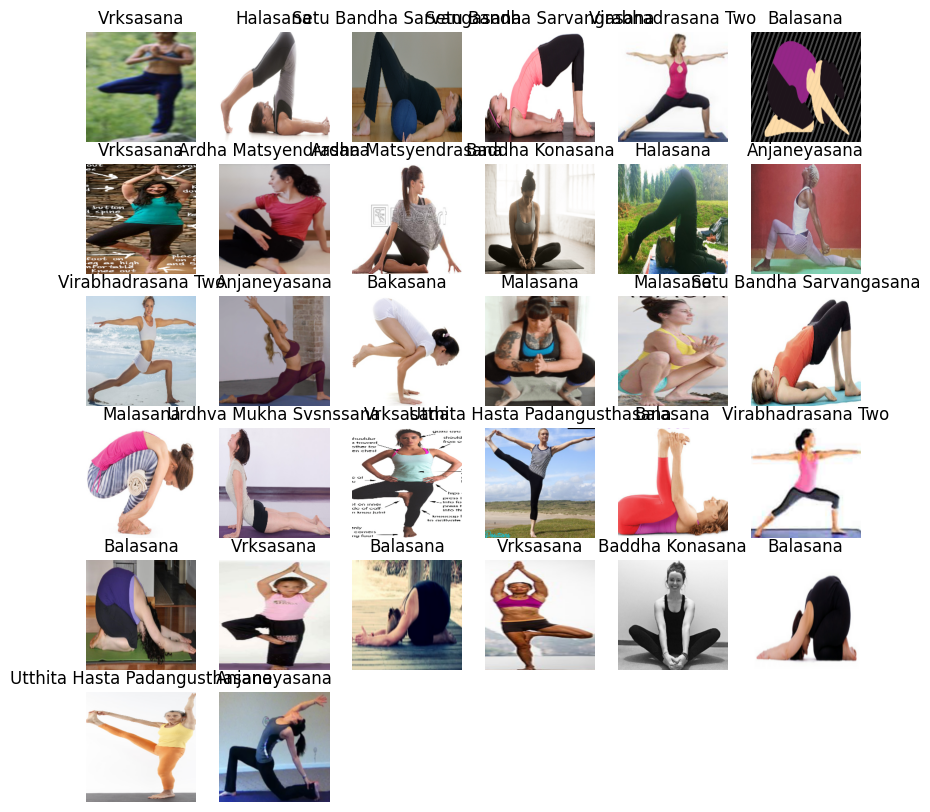

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
class_names = train_ds.class_names

for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Extract the class label from the one-hot encoded array
        class_label_index = int(np.argmax(labels[i]))
        plt.title(class_names[class_label_index])
        
        plt.axis("off")

plt.show()


## convert rgb to grey scale

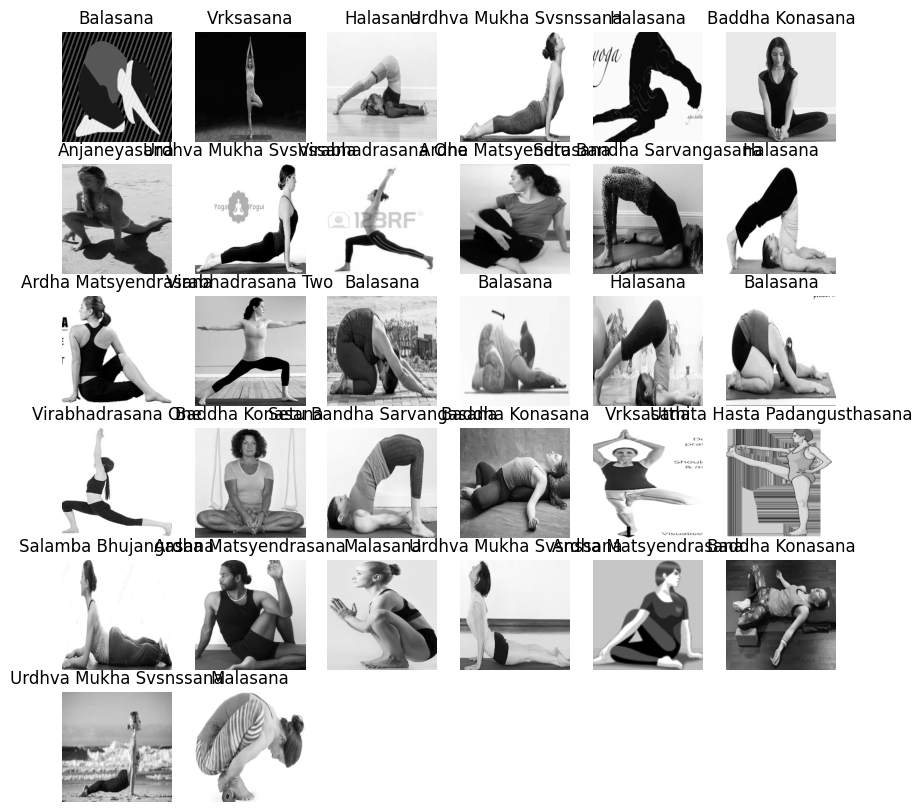

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
class_names = train_ds.class_names

for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        
        # Convert RGB image to grayscale
        grayscale_image = np.dot(images[i].numpy(), [0.2989, 0.5870, 0.1140])
        plt.imshow(grayscale_image, cmap='gray')
        
        # Extract the class label from the one-hot encoded array
        class_label_index = int(np.argmax(labels[i]))
        plt.title(class_names[class_label_index])
        
        plt.axis("off")

plt.show()


## image Augumentation


In [5]:
directory = r'data'

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    validation_split=0.2,
    fill_mode='nearest'
)


# Train data iterator
train_it = datagen.flow_from_directory(
    directory,
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=100,
    subset='training',
    seed=24
)

# Validation data iterator
val_it = datagen.flow_from_directory(
    directory,
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=100,
    subset='validation',
    seed=24
)



Found 872 images belonging to 15 classes.
Found 209 images belonging to 15 classes.


In [6]:
train_it.class_indices


{'Adho Mukha Svanasana': 0,
 'Anjaneyasana': 1,
 'Ardha Matsyendrasana': 2,
 'Baddha Konasana': 3,
 'Bakasana': 4,
 'Balasana': 5,
 'Halasana': 6,
 'Malasana': 7,
 'Salamba Bhujangasana': 8,
 'Setu Bandha Sarvangasana': 9,
 'Urdhva Mukha Svsnssana': 10,
 'Utthita Hasta Padangusthasana': 11,
 'Virabhadrasana One': 12,
 'Virabhadrasana Two': 13,
 'Vrksasana': 14}

## model artitecture

In [7]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(15, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 15)                752655    
                                                                 
Total params: 7790159 (29.72 MB)
Trainable params: 752655 (2.87 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


## model training

In [8]:
# Train the model
history = model.fit(
    train_it,
    validation_data=val_it,
    epochs=20
)

Epoch 1/20
3/9 [=========>....................] - ETA: 46s - loss: 10.9864 - accuracy: 0.0933

d:\codeleaf\Deep_Learning\fruit\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 [==============================] - 96s 10s/step - loss: 16.3713 - accuracy: 0.1583 - val_loss: 13.8108 - val_accuracy: 0.2392
Epoch 2/20
9/9 [==============================] - 82s 9s/step - loss: 8.8647 - accuracy: 0.2810 - val_loss: 7.3997 - val_accuracy: 0.3493
Epoch 3/20
9/9 [==============================] - 79s 9s/step - loss: 4.5935 - accuracy: 0.5057 - val_loss: 3.0861 - val_accuracy: 0.4880
Epoch 4/20
9/9 [==============================] - 80s 9s/step - loss: 2.0087 - accuracy: 0.6548 - val_loss: 2.1735 - val_accuracy: 0.6507
Epoch 5/20
9/9 [==============================] - 90s 10s/step - loss: 1.0321 - accuracy: 0.7775 - val_loss: 1.7716 - val_accuracy: 0.7273
Epoch 6/20
9/9 [==============================] - 87s 10s/step - loss: 0.7015 - accuracy: 0.8383 - val_loss: 1.9111 - val_accuracy: 0.6794
Epoch 7/20
9/9 [==============================] - 88s 10s/step - loss: 0.5692 - accuracy: 0.8429 - val_loss: 1.5554 - val_accuracy: 0.6986
Epoch 8/20
9/9 [=======================

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


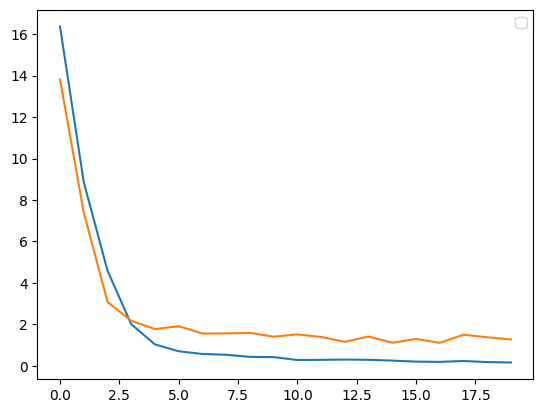

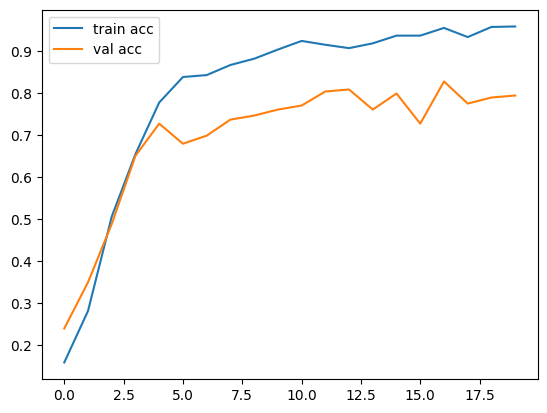

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [10]:
model.evaluate(val_it)


3/3 [==============================] - 11s 3s/step - loss: 1.3676 - accuracy: 0.7990


[1.3675894737243652, 0.7990430593490601]

## model accuracy

In [11]:

# Print the final training and validation accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Final Accuracy: 0.9587156176567078
Final Validation Accuracy: 0.7942583560943604


# Saving Model

In [12]:
model.save('densnet_model.h5')

d:\codeleaf\Deep_Learning\fruit\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
from tensorflow import keras
model = keras.models.load_model('densnet_model.h5')

# predicted by user input

In [30]:
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

import numpy as np

# Assuming 'model' is already defined
model = load_model('densnet_model.h5')

# New dictionary mapping class indices to class labels
class_dict = {
 0:'Adho Mukha Svanasana',
 1:'Anjaneyasana',
 2:'Ardha Matsyendrasana',
 3:'Baddha Konasana',
 4:'Bakasana',
 5:'Balasana',
 6:'Halasana',
 7:'Malasana',
 8:'Salamba Bhujangasana',
 9:'Setu Bandha Sarvangasana',
 10:'Urdhva Mukha Svsnssana',
 11:'Utthita Hasta Padangusthasana',
 12:'Virabhadrasana One',
 13:'Virabhadrasana Two',
 14:'Vrksasana'
}
image_path = r'data\Bakasana\File15.png'
image = load_img(image_path, target_size=(224, 224))
img = np.array(image)
img = preprocess_input(img)
img = img.reshape(1, 224, 224, 3)

prediction = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the corresponding class label
predicted_class_label = class_dict[predicted_class_index]

# Print the predicted class label
print(f"The predicted class is: {predicted_class_label}")

1/1 [==============================] - 1s 1s/step
The predicted class is: Bakasana


In [28]:
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

import numpy as np

# Load the pre-trained model
model = load_model('densnet_model.h5')

# New dictionary mapping class indices to class labels
class_dict = {
 'Adho Mukha Svanasana': 0,
 'Anjaneyasana': 1,
 'Ardha Matsyendrasana': 2,
 'Baddha Konasana': 3,
 'Bakasana': 4,
 'Balasana': 5,
 'Halasana': 6,
 'Malasana': 7,
 'Salamba Bhujangasana': 8,
 'Setu Bandha Sarvangasana': 9,
 'Urdhva Mukha Svsnssana': 10,
 'Utthita Hasta Padangusthasana': 11,
 'Virabhadrasana One': 12,
 'Virabhadrasana Two': 13,
 'Vrksasana': 14
}

image_path = r'data\Anjaneyasana\File15.png'
image = load_img(image_path, target_size=(224, 224))
img = np.array(image)
img = preprocess_input(img)
img = img.reshape(1, 224, 224, 3)

prediction = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the corresponding class label from the new class dictionary
predicted_class_label = [k for k, v in class_dict.items() if v == predicted_class_index][0]

# Print the predicted class label
print(f"The predicted class is: {predicted_class_label}")


1/1 [==============================] - 2s 2s/step
The predicted class is: Anjaneyasana


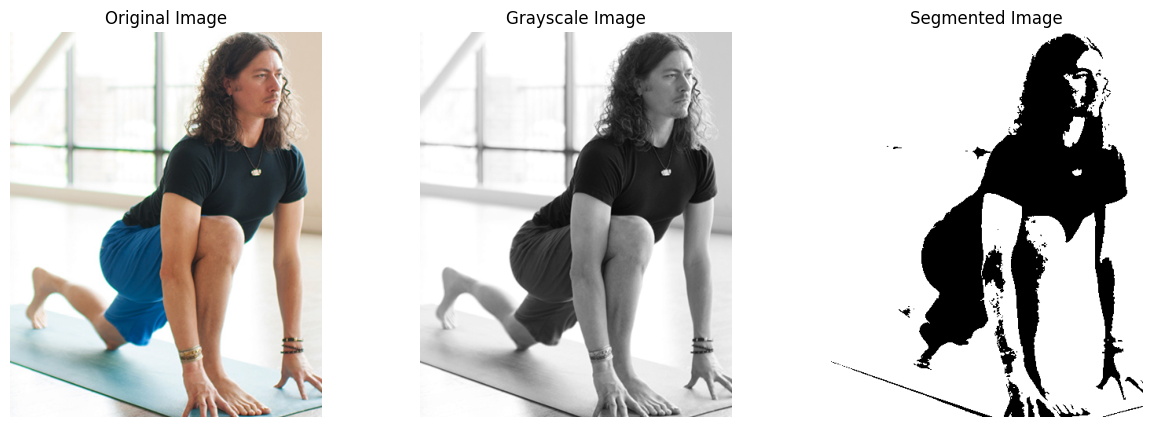

In [21]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = r'data\Anjaneyasana\File7.png'

image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the original, grayscale, and segmented images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Grayscale Image
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Segmented Image
plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()


In [22]:
train_it.class_indices

{'Adho Mukha Svanasana': 0,
 'Anjaneyasana': 1,
 'Ardha Matsyendrasana': 2,
 'Baddha Konasana': 3,
 'Bakasana': 4,
 'Balasana': 5,
 'Halasana': 6,
 'Malasana': 7,
 'Salamba Bhujangasana': 8,
 'Setu Bandha Sarvangasana': 9,
 'Urdhva Mukha Svsnssana': 10,
 'Utthita Hasta Padangusthasana': 11,
 'Virabhadrasana One': 12,
 'Virabhadrasana Two': 13,
 'Vrksasana': 14}

In [23]:
type(prediction)

numpy.ndarray

In [24]:
print(prediction)

[[3.0976921e-04 9.8177952e-01 1.6866711e-11 6.4382640e-08 4.9078409e-07
  8.7076724e-10 6.8771935e-09 1.0382515e-09 4.1870234e-07 4.0830411e-10
  4.7650217e-12 2.2551680e-05 1.7887028e-02 3.9120859e-12 6.6758759e-08]]
